<center>Student name: Mohammed Nasser M ALSHUTWI - 2018-CSE5CI - Student ID: 18187708</center>
                           
# Assignment - Part I
## Fuzzy System for Forecasting Electricity Price

<hr>

Future estimation requires understanding of the causes and affects of the expected output. This estimation is usually based on experience and knowledge in the same feild. Machine learning models have been widly used in this matter as a powerful tool to analyse and based on that it can place its predicted result just like humans do. In this report a Fuzzy Logic model has been developed and used to mimec human knowledge and experiance in the aspect of electricity price in Queensland in order to predict the price of electricity at a certain time.

## importing packages

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

<hr>

## 1. Removing outliers

#### <u><li>Quick observation</u>
Before removing the outliers of the output variable from both our training and testing datasets, we need to make a quick observation on the values of the output variable by retrieving these values and plotting them into two separate graphs.

In [2]:
# retrieve the data from both datasets using Pandas library to read from CSV files
trainingData = pd.read_csv( "2018_CI_Assignment_Training_Data.csv" )
testingData = pd.read_csv( "2018_CI_Assignment_Testing_Data.csv" )

# converting the retrieved datasets of type data to arrays using Numpy
trainingData = np.array( trainingData )
testingData = np.array( testingData )

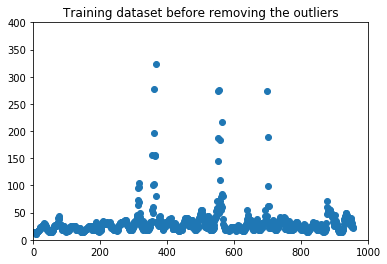

In [3]:
# plotting the values of the output variable in our training dataset using Matplotlib library
plt.plot(trainingData[:, 6], 'o')
plt.xlim(0, 1000)
plt.ylim(0, 400)
plt.title( "Training dataset before removing the outliers" )
plt.show()

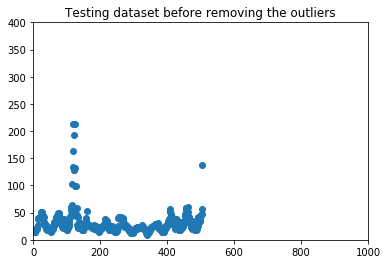

In [4]:
# plotting the values of the output variable in our testing dataset using Matplotlib library
plt.plot(testingData[:, 6], 'o')
plt.xlim(0, 1000)
plt.ylim(0, 400)
plt.title( "Testing dataset before removing the outliers" )
plt.show()

As we can see from the previous two graphs, the outlier values of the output variables in our training and testing datasets can be observed clearly which are plotted far from the rest values of the output variables in both datasets.

#### <u><li>Removing outliers</u>
In order to remove the outliers of the output variable, we need to define the range of the output vriable values. To do that, we need to specify the lower quartile (Q1) as well as the upper quartile (Q3) of these values. Then the range can be defined as: 
<br><br>
               <center>range = [ Q1 - 1.5 * ( Q3 - Q1 ), Q3 + 1.5 * ( Q3 - Q1 ) ]</center>

Removing outliers from Training dataset:

In [5]:
# specifying Q1 and Q3 of the training dataset
Q1_trainingData = np.percentile( trainingData[:, 6], 25 )
Q3_trainingData = np.percentile( trainingData[:, 6], 75 )

# defining the range of the output variable values
range_trainingData = [ Q1_trainingData - 1.5 * ( Q3_trainingData - Q1_trainingData ),
                       Q3_trainingData + 1.5 * ( Q3_trainingData - Q1_trainingData ) ]

# locating the indexes of the elements having outlier output values
position_trainingData = np.concatenate( ( np.where( trainingData[:, 6] > range_trainingData[1] ),
                                          np.where( trainingData[:, 6] < range_trainingData[0] ) ),
                                          axis = 1 )

# deleting all the elements having outlier output values by referring to their indexes
trainingData_clean = np.delete( trainingData, position_trainingData, 0 )

Removing outliers from Testing dataset:

In [6]:
# specifying Q1 and Q3 of the testing dataset
Q1_testingData = np.percentile( testingData[:, 6], 25 )
Q3_testingData = np.percentile( testingData[:, 6], 75 )

# defining the range of the output variable values
range_testingData = [ Q1_testingData - 1.5 * ( Q3_testingData - Q1_testingData ),
                      Q3_testingData + 1.5 * ( Q3_testingData - Q1_testingData ) ]

# locating the indexes of the elements having outlier output values
position_testingData = np.concatenate( ( np.where( testingData[:, 6] > range_testingData[1] ),
                                         np.where( testingData[:, 6] < range_testingData[0] ) ),
                                         axis = 1 )

# deleting all the elements having outlier output values by referring to their indexes
testingData_clean = np.delete( testingData, position_testingData, 0 )

#### <u><li>List the outliers</u>

Listing the elements having outliers of the output variable in our training dataset:

In [7]:
# populating a list of the outlier elements in the training dataset 
# by using their indexes from position_trainingData list
outlierList_trainingData = [ trainingData[index] for index in position_trainingData ]
outlierList_trainingData = outlierList_trainingData[0]

print( "List of %d elements in the training dataset having outlier outputs:\n\n"
        % outlierList_trainingData.shape[0],
        outlierList_trainingData )

List of 55 elements in the training dataset having outlier outputs:

 [[  29.9    30.1    30.2  6492.8  6528.3  6502.     64.85]
 [  30.1    30.2    29.6  6528.3  6502.   6491.4    72.77]
 [  30.2    29.6    29.6  6502.   6491.4  6466.7    95.09]
 [  29.6    29.6    29.   6491.4  6466.7  6510.7   103.77]
 [  29.6    29.     29.   6466.7  6510.7  6503.6    97.24]
 [  29.     29.     28.6  6510.7  6503.6  6467.9    69.41]
 [  30.7    30.5    30.7  6545.1  6585.9  6589.3   155.25]
 [  30.5    30.7    31.   6585.9  6589.3  6658.9    55.3 ]
 [  31.     30.1    30.5  6658.9  6694.1  6744.1    59.61]
 [  30.1    30.5    31.   6694.1  6744.1  6722.1   101.08]
 [  30.5    31.     31.2  6744.1  6722.1  6786.4   101.74]
 [  31.     31.2    30.6  6722.1  6786.4  6814.2   196.34]
 [  31.2    30.6    31.3  6786.4  6814.2  6870.    276.91]
 [  30.6    31.3    30.3  6814.2  6870.   6851.3   460.29]
 [  31.3    30.3    30.1  6870.   6851.3  6826.7   156.48]
 [  30.3    30.1    29.3  6851.3  6826.7  679

Listing the elements having outliers of the output variable in our testing dataset:

In [8]:
# populating a list of the outlier elements in the testing dataset 
# by using their indexes from position_testingData list
outlierList_testingData = [ testingData[index] for index in position_testingData ]
outlierList_testingData = outlierList_testingData[0]

print( "List of %d elements in the testing dataset having outlier outputs:\n\n"
        % outlierList_testingData.shape[0],
        outlierList_testingData )

List of 21 elements in the testing dataset having outlier outputs:

 [[  31.6    31.9    31.3  5742.   5990.6  6095.8    59.53]
 [  31.4    31.2    30.9  6165.2  6211.5  6236.8    63.49]
 [  31.2    30.9    30.7  6211.5  6236.8  6284.3   102.73]
 [  30.7    29.7    29.5  6284.3  6299.5  6328.6   162.74]
 [  29.7    29.5    29.2  6299.5  6328.6  6317.    213.1 ]
 [  29.5    29.2    28.8  6328.6  6317.   6331.9   134.67]
 [  29.2    28.8    28.6  6317.   6331.9  6327.8   192.36]
 [  28.8    28.6    28.7  6331.9  6327.8  6322.2   128.53]
 [  28.6    28.7    28.5  6327.8  6322.2  6345.3   127.75]
 [  28.7    28.5    28.1  6322.2  6345.3  6309.6   131.21]
 [  28.5    28.1    28.   6345.3  6309.6  6290.    213.88]
 [  28.1    28.     27.4  6309.6  6290.   6299.7    99.3 ]
 [  28.     27.4    27.7  6290.   6299.7  6254.6    99.3 ]
 [  27.4    27.     26.3  6050.8  5917.   5972.8    59.32]
 [  25.2    25.3    25.3  6571.5  6567.5  6645.9    56.08]
 [  24.9    25.7    24.3  6590.4  6588.7  6631

#### <u><li>Rebuilding the training and the testing datasets</u>

In [9]:
# defining the headers for both datasets
fileHeader = [ "T(t-2)", "T(t-1)", "T(t)", "D(t-2)", "D(t-1)", "D(t)", "P(t+1)" ]

Rebuilding the clean training dataset (without outliers):

In [10]:
csvFile = open( "trainingDataset_clean.csv", "w" )
writer = csv.writer( csvFile )

# writing the headers and the clean dataset
writer.writerow( fileHeader )
writer.writerows( trainingData_clean )

csvFile.close()

Rebuilding the clean testing dataset (without outliers):

In [11]:
csvFile = open( "testingDataset_clean.csv", "w" )
writer = csv.writer( csvFile )

# writing the headers and the clean dataset
writer.writerow( fileHeader )
writer.writerows( testingData_clean )

csvFile.close()

now we need to retrieve the data from both cleaned datasets in order to do the work on them.

In [12]:
# retrieve the data from both cleaned datasets using Pandas library to read from CSV files
trainingData = pd.read_csv( "trainingDataset_clean.csv" )
testingData = pd.read_csv( "testingDataset_clean.csv" )

# converting the retrieved datasets of type data to arrays using Numpy
trainingData = np.array( trainingData )
testingData = np.array( testingData )

A quick observation on the values of the output variables in both datasets:

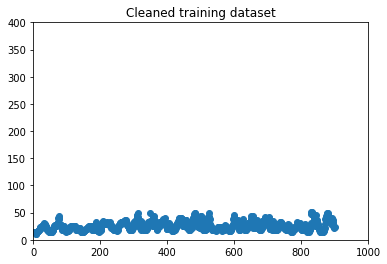

In [13]:
# plotting the values of the output variable in our cleaned training dataset
plt.plot(trainingData[:, 6], 'o')
plt.xlim(0, 1000)
plt.ylim(0, 400)
plt.title( "Cleaned training dataset" )
plt.show()

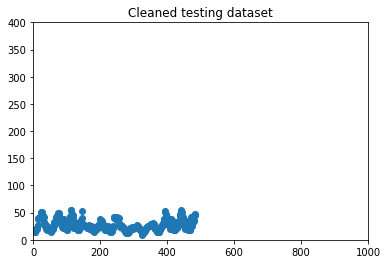

In [14]:
# plotting the values of the output variable in our cleaned testing dataset
plt.plot(testingData[:, 6], 'o')
plt.xlim(0, 1000)
plt.ylim(0, 400)
plt.title( "Cleaned testing dataset" )
plt.show()

Now as we can observe from last two graphs, both datasets are clean and ready to work on in our fuzzy model.

<hr>

## 2. Correlation Analysis
It is much easier and beneficial to analyse and work with only the important features having strong relationships with the actual output variable as well as weak relationships between each other in our training dataset. To do so, Correlation Analysis can help to find these features so that they can be included in the fuzzy modelling along with the output variable. Correlation Coefficient Matrix (CCM) is the result where we can analyse the relationships of the features and besed on it the decisios are made on whether to include or exclude a certain feature.

#### <u><li>Calculate the Correlation Coefficient Matrix (CCM)</u>

In [15]:
# Store the features of our training dataset in the matrix A
A = np.row_stack( ( trainingData[:, 0],
                    trainingData[:, 1],
                    trainingData[:, 2],
                    trainingData[:, 3],
                    trainingData[:, 4],
                    trainingData[:, 5],
                    trainingData[:, 6] ) )

# Calculate the CCM of our training dataset using numpy.corrcoef() method
CCM_training = np.corrcoef( A )
print ( CCM_training )

[[1.         0.97711422 0.94083427 0.43523077 0.49341031 0.54010843
  0.49325377]
 [0.97711422 1.         0.97678556 0.37103657 0.43915887 0.49715253
  0.46219849]
 [0.94083427 0.97678556 1.         0.29729518 0.37354107 0.44142236
  0.41799108]
 [0.43523077 0.37103657 0.29729518 1.         0.98603698 0.9497314
  0.52955784]
 [0.49341031 0.43915887 0.37354107 0.98603698 1.         0.98603361
  0.56492116]
 [0.54010843 0.49715253 0.44142236 0.9497314  0.98603361 1.
  0.5877078 ]
 [0.49325377 0.46219849 0.41799108 0.52955784 0.56492116 0.5877078
  1.        ]]


#### <u><li>Observation</u>

From the above result of CCM_training, we can observe the following:
1. There are strong positive linear relationships between the features representing the Temperature, i.e. T(t-2), T(t-1) and T(t).
2. Strong positive linear relationships between the features representing the Demand, i.e. D(t-2), D(t-1) and D(t).
3. No Strong positive or negative relationships between features representing the Temperature and features representing the Demand.
4. The strongest relationship among features representing the Temperature with P(t+1) values is T(t-2).
5. The strongest relationship among features representing the Demand with P(t+1) values is D(t).

Based on the above CCM_training result, we can choose the following input/output features to be included in our fuzzy modelling:
1. T(t-2) to be representing the Temperature because it has the strongest relationship with P(t+1) among the other Temperature features.
2. D(t) representing the Demands because it has the strongest relationship with P(t+1) among the other Demand features.
3. P(t+1) representing the price values as it is the target output of the system.

<hr>

After cleaning both datasets and choosing the features to be included, it is time to start developing our fuzzy model by starting with defining the membership functions.

## 3. Membership Functions

As we do not have any experiential knowledge about the data we are dealing with, it is logical to separately plot the included features in graphs. Each of can be easily visualized and based on that we can set our membership fuctions.

#### <u><li>Quick observation on the included features</u>

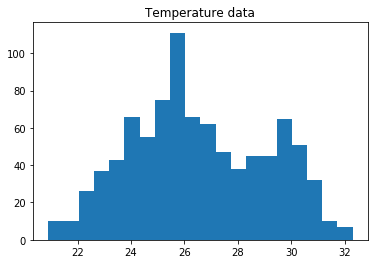

In [16]:
# Plotting Temperature values i.e. T(t-2)
plt.figure()
plt.hist( trainingData[:, 0], 20 )
plt.title( "Temperature data" )
plt.show()

Based on the above graph, we can set the membership functions for the Temperature feature to be as following:
1. low = [ 20, 24 ]
2. medium = [ 22, 29 ]
3. high = [ 28, 34 ]

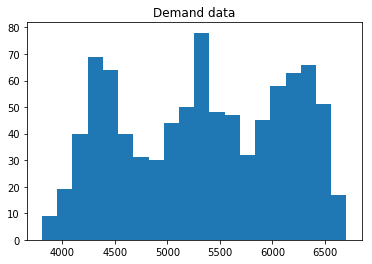

In [17]:
# Plotting Demand values i.e. D(t)
plt.figure()
plt.hist( trainingData[:, 5], 20 )
plt.title( "Demand data" )
plt.show()

Based on this Demand data graph, we can set the membership functions for the Demand feature to be as following:
1. very low = [ 3500, 4500 ]
2. low = [ 3700, 5000 ]
3. medium = [ 4500, 6000 ]
4. high = [ 5500, 7000 ]
5. very high = [ 6250, 7000 ]

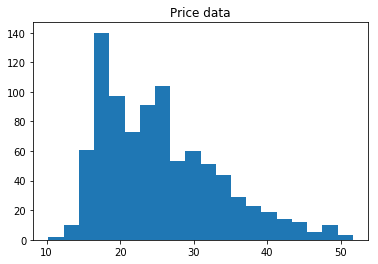

In [18]:
# Plotting Price values i.e. P(t+1)
plt.figure()
plt.hist( trainingData[:, 6], 20 )
plt.title( "Price data" )
plt.show()

Based on the above graph, we can set the membership functions for the Price feature to be as following:
1. low = [ 10, 20 ]
2. medium = [ 12, 35 ]
3. high = [ 25, 55 ]



#### <u><li>Defining membership functions</u>

Defining Antecedent/Consequent objects which will be holding the universe variables and membership functions:

In [19]:
# populating Antecedent/Consequent objects with the values in T(t-2), D(t) and P(t+1) columns
# in our training dataset

temperature = ctrl.Antecedent( np.arange( 20, 34, 1 ), "temperature" )
demand = ctrl.Antecedent( np.arange( 3500, 7000, 1 ), "demand" )
price = ctrl.Consequent( np.arange( 10, 55, 1 ), "price" )

Defining the linguistic variables for both input and output fuzzy sets, and setting up the membership functions for them:

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


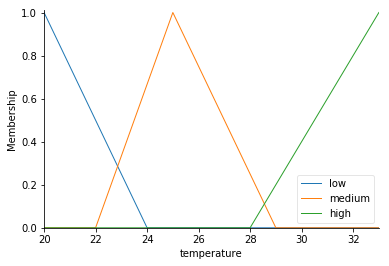

In [20]:
# Defining the linguistic variables and membership functions for the input temperature 
# using .trimf() method

temperature[ "low" ] = fuzz.trimf( temperature.universe, [ 20, 20, 24 ] )
temperature[ "medium" ] = fuzz.trimf( temperature.universe, [ 22, 25, 29 ] )
temperature[ "high" ] = fuzz.trimf( temperature.universe, [ 28, 33, 34 ] )

temperature.view()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


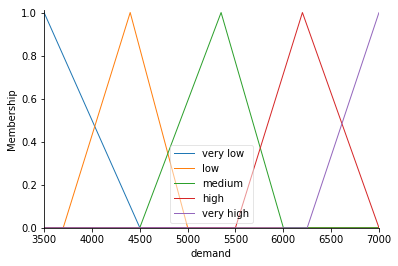

In [21]:
# Defining the linguistic variables and membership functions for the input demand 
# using .trimf() method

demand[ "very low" ] = fuzz.trimf( demand.universe, [ 3500, 3500, 4500 ] )
demand[ "low" ] = fuzz.trimf( demand.universe, [ 3700, 4400, 5000 ] )
demand[ "medium" ] = fuzz.trimf( demand.universe, [ 4500, 5350, 6000 ] )
demand[ "high" ] = fuzz.trimf( demand.universe, [ 5500, 6200, 7000 ] )
demand[ "very high" ] = fuzz.trimf( demand.universe, [ 6250, 7000, 7000 ] )

demand.view()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


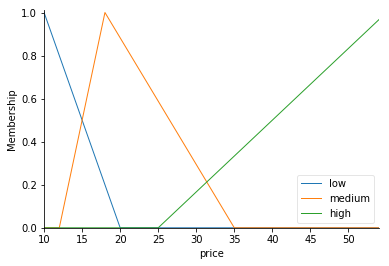

In [22]:
# Defining the linguistic variables and membership functions for the input price 
# using .trimf() method

price[ "low" ] = fuzz.trimf( price.universe, [ 10, 10, 20 ] )
price[ "medium" ] = fuzz.trimf( price.universe, [ 12, 18, 35 ] )
price[ "high" ] = fuzz.trimf( price.universe, [ 25, 55, 55 ] )

price.view()

<hr>

## 4. Fuzzy Rules

In order to extract our fuzzy rules, we need to go through each membership function in the Temperature and Demand and check the records that are lying in each of these membership functions. For example, to check which of the records that are falling in low temperature and very low demand and so on. The result of each is plotted in the Price axis so that it can be visualize and, and based on that the fuzzy rules are extracted according to Price membership functions.

#### <u><li>Data visualization and rules extraction</u>

<u>Checking low temperature and very low demand elements:</u>

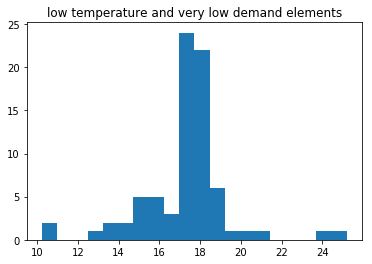

There are 77 records lying in low temperature and very low demand ranges


In [23]:
# allocating the elements having low temperature and very low demand
lowTemp_veryLowDemand = np.array( np.where( ( trainingData[:, 0] >= 20 ) & ( trainingData[:, 0] <= 24 ) &
                                          ( trainingData[:, 5] >= 3500 ) & ( trainingData[:, 5] <= 4500 ) ) )

lowTemp_veryLowDemandElements = [ trainingData[index] for index in lowTemp_veryLowDemand ][0]

# plotting elements with low temperature and very low demand
plt.figure()
plt.hist( lowTemp_veryLowDemandElements[:, 6], 20 )
plt.title( "low temperature and very low demand elements" )
plt.show()

print( "There are %d records lying in low temperature and very low demand ranges"
        % len( lowTemp_veryLowDemandElements ) )

Based on this we can extract our 1st rule as: <b>IF temperature is low AND demand is very low THEN price is low</b>

<u>Checking low temperature and low demand elements:</u>

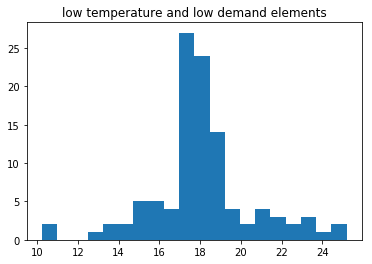

There are 107 records lying in low temperature and low demand ranges


In [24]:
# allocating the elements having low temperature and low demand
lowTemp_lowDemand = np.array( np.where( ( trainingData[:, 0] >= 20 ) & ( trainingData[:, 0] <= 24 ) &
                                      ( trainingData[:, 5] >= 3700 ) & ( trainingData[:, 5] <= 5000 ) ) )

lowTemp_lowDemandElements = [ trainingData[index] for index in lowTemp_lowDemand ][0]

# plotting elements with low temperature and low demand
plt.figure()
plt.hist( lowTemp_lowDemandElements[:, 6], 20 )
plt.title( "low temperature and low demand elements" )
plt.show()

print( "There are %d records lying in low temperature and low demand ranges"
        % len( lowTemp_lowDemandElements ) )

Based on this we can extract our 2nd rule as: <b>IF temperature is low AND demand is low THEN price is low</b>

<u>Checking low temperature and medium demand elements:</u>

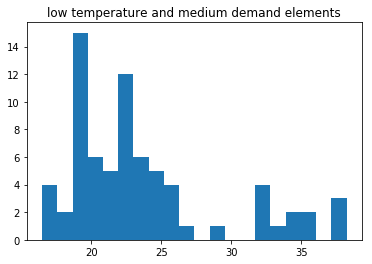

There are 73 records lying in low temperature and medium demand ranges


In [25]:
# allocating the elements having low temperature and medium demand
lowTemp_mediumDemand = np.array( np.where( ( trainingData[:, 0] >= 20 ) & ( trainingData[:, 0] <= 24 ) &
                                         ( trainingData[:, 5] >= 4500 ) & ( trainingData[:, 5] <= 6000 ) ) )

lowTemp_mediumDemandElements = [ trainingData[index] for index in lowTemp_mediumDemand ][0]

# plotting elements with low temperature and medium demand
plt.figure()
plt.hist( lowTemp_mediumDemandElements[:, 6], 20 )
plt.title( "low temperature and medium demand elements" )
plt.show()

print( "There are %d records lying in low temperature and medium demand ranges"
        % len( lowTemp_mediumDemandElements ) )

Based on this we can extract our 3rd rule as: <b>IF temperature is low AND demand is medium THEN price is medium</b>

<u>Checking low temperature and high demand elements:</u>

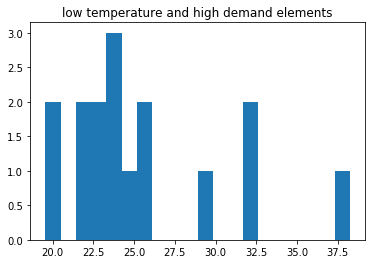

There are 16 records lying in low temperature and high demand ranges


In [26]:
# allocating the elements having low temperature and high demand
lowTemp_highDemand = np.array( np.where( ( trainingData[:, 0] >= 20 ) & ( trainingData[:, 0] <= 24 ) &
                                       ( trainingData[:, 5] >= 5500 ) & ( trainingData[:, 5] <= 7000 ) ) )

lowTemp_highDemandElements = [ trainingData[index] for index in lowTemp_highDemand ][0]

# plotting elements with low temperature and high demand
plt.figure()
plt.hist( lowTemp_highDemandElements[:, 6], 20 )
plt.title( "low temperature and high demand elements" )
plt.show()

print( "There are %d records lying in low temperature and high demand ranges"
        % len( lowTemp_highDemandElements ) )

Based on this we can extract our 4th rule as: <b>IF temperature is low AND demand is high THEN price is medium</b>

<u>Checking low temperature and very high demand elements:</u>

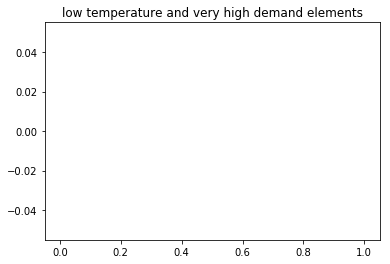

There are 0 records lying in low temperature and very high demand ranges


In [27]:
# allocating the elements having low temperature and very high demand
lowTemp_veryHighDemand = np.array( np.where( ( trainingData[:, 0] >= 20 ) & ( trainingData[:, 0] <= 24 ) &
                                           ( trainingData[:, 5] >= 6250 ) & ( trainingData[:, 5] <= 7000 ) ) )

lowTemp_veryHighDemandElements = [ trainingData[index] for index in lowTemp_veryHighDemand ][0]

# plotting elements with low temperature and very high demand
plt.figure()
plt.hist( lowTemp_veryHighDemandElements[:, 6], 20 )
plt.title( "low temperature and very high demand elements" )
plt.show()

print( "There are %d records lying in low temperature and very high demand ranges"
        % len( lowTemp_veryHighDemandElements ) )

Based on this there will not be a fuzzy rule for elements having low temperature and very high demand since the number of found records is zero

<u>Checking medium temperature and very low demand elements:</u>

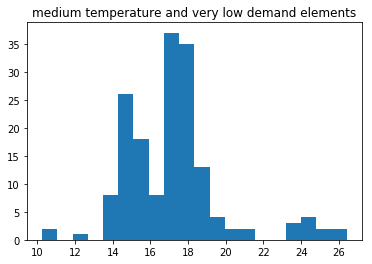

There are 167 records lying in medium temperature and very low demand ranges


In [28]:
# allocating the elements having medium temperature and very low demand
mediumTemp_veryLowDemand = np.array( np.where( ( trainingData[:, 0] >= 22 ) & ( trainingData[:, 0] <= 29 ) &
                                             ( trainingData[:, 5] >= 3500 ) & ( trainingData[:, 5] <= 4500 ) ) )

mediumTemp_veryLowDemandElements = [ trainingData[index] for index in mediumTemp_veryLowDemand ][0]

# plotting elements with medium temperature and very low demand
plt.figure()
plt.hist( mediumTemp_veryLowDemandElements[:, 6], 20 )
plt.title( "medium temperature and very low demand elements" )
plt.show()

print( "There are %d records lying in medium temperature and very low demand ranges"
        % len( mediumTemp_veryLowDemandElements ) )

Based on this we can extract our 5th rule as: <b>IF temperature is medium AND demand is very low THEN price is medium</b>

<u>Checking medium temperature and low demand elements:</u>

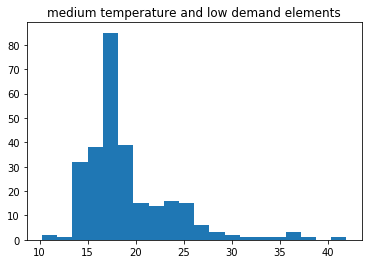

There are 276 records lying in medium temperature and low demand ranges


In [29]:
# allocating the elements having medium temperature and low demand
mediumTemp_lowDemand = np.array( np.where( ( trainingData[:, 0] >= 22 ) & ( trainingData[:, 0] <= 29 ) &
                                         ( trainingData[:, 5] >= 3700 ) & ( trainingData[:, 5] <= 5000 ) ) )

mediumTemp_lowDemandElements = [ trainingData[index] for index in mediumTemp_lowDemand ][0]

# plotting elements with medium temperature and low demand
plt.figure()
plt.hist( mediumTemp_lowDemandElements[:, 6], 20 )
plt.title( "medium temperature and low demand elements" )
plt.show()

print( "There are %d records lying in medium temperature and low demand ranges"
        % len( mediumTemp_lowDemandElements ) )

Based on this we can extract our 6th rule as: <b>IF temperature is medium AND demand is low THEN price is medium</b>

<u>Checking medium temperature and medium demand elements:</u>

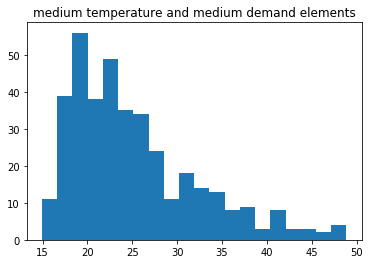

There are 382 records lying in medium temperature and medium demand ranges


In [30]:
# allocating the elements having medium temperature and medium demand
mediumTemp_mediumDemand = np.array( np.where( ( trainingData[:, 0] >= 22 ) & ( trainingData[:, 0] <= 29 ) &
                                            ( trainingData[:, 5] >= 4500 ) & ( trainingData[:, 5] <= 6000 ) ) )

mediumTemp_mediumDemandElements = [ trainingData[index] for index in mediumTemp_mediumDemand ][0]

# plotting elements with medium temperature and medium demand
plt.figure()
plt.hist( mediumTemp_mediumDemandElements[:, 6], 20 )
plt.title( "medium temperature and medium demand elements" )
plt.show()

print( "There are %d records lying in medium temperature and medium demand ranges"
        % len( mediumTemp_mediumDemandElements ) )

Based on this we can extract our 7th rule as: <b>IF temperature is medium AND demand is medium THEN price is medium</b>

<u>Checking medium temperature and high demand elements:</u>

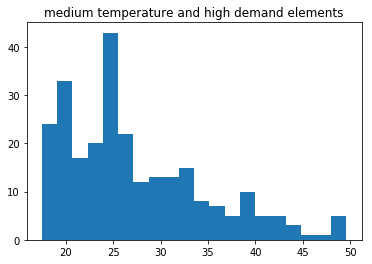

There are 262 records lying in medium temperature and high demand ranges


In [31]:
# allocating the elements having medium temperature and high demand
mediumTemp_highDemand = np.array( np.where( ( trainingData[:, 0] >= 22 ) & ( trainingData[:, 0] <= 29 ) &
                                          ( trainingData[:, 5] >= 5500 ) & ( trainingData[:, 5] <= 7000 ) ) )

mediumTemp_highDemandElements = [ trainingData[index] for index in mediumTemp_highDemand ][0]

# plotting elements with medium temperature and high demand
plt.figure()
plt.hist( mediumTemp_highDemandElements[:, 6], 20 )
plt.title( "medium temperature and high demand elements" )
plt.show()

print( "There are %d records lying in medium temperature and high demand ranges"
        % len( mediumTemp_highDemandElements ) )

Based on this we can extract our 8th rule as: <b>IF temperature is medium AND demand is high THEN price is medium</b>

<u>Checking medium temperature and very high demand elements:</u>

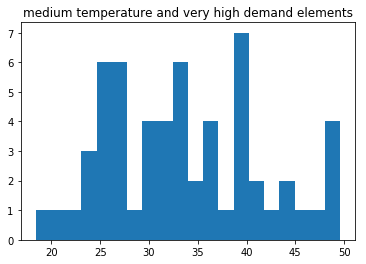

There are 58 records lying in medium temperature and very high demand ranges


In [32]:
# allocating the elements having medium temperature and very high demand
mediumTemp_veryHighDemand = np.array( np.where( ( trainingData[:, 0] >= 22 ) & ( trainingData[:, 0] <= 29 ) &
                                              ( trainingData[:, 5] >= 6250 ) & ( trainingData[:, 5] <= 7000 ) ) )

mediumTemp_veryHighDemandElements = [ trainingData[index] for index in mediumTemp_veryHighDemand ][0]

# plotting elements with medium temperature and very high demand
plt.figure()
plt.hist( mediumTemp_veryHighDemandElements[:, 6], 20 )
plt.title( "medium temperature and very high demand elements" )
plt.show()

print( "There are %d records lying in medium temperature and very high demand ranges"
        % len( mediumTemp_veryHighDemandElements ) )

Based on this we can extract our 9th rule as: <b>IF temperature is medium AND demand is very high THEN price is high</b>

<u>Checking high temperature and very low demand elements:</u>

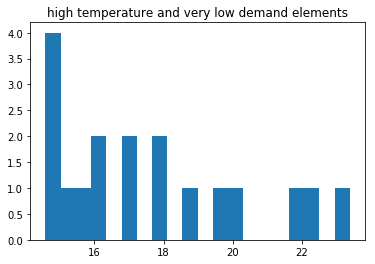

There are 18 records lying in high temperature and very low demand ranges


In [33]:
# allocating the elements having high temperature and very low demand
highTemp_veryLowDemand = np.array( np.where( ( trainingData[:, 0] >= 28 ) & ( trainingData[:, 0] <= 34 ) &
                                          ( trainingData[:, 5] >= 3500 ) & ( trainingData[:, 5] <= 4500 ) ) )

highTemp_veryLowDemandElements = [ trainingData[index] for index in highTemp_veryLowDemand ][0]

# plotting elements with high temperature and very low demand
plt.figure()
plt.hist( highTemp_veryLowDemandElements[:, 6], 20 )
plt.title( "high temperature and very low demand elements" )
plt.show()

print( "There are %d records lying in high temperature and very low demand ranges"
        % len( highTemp_veryLowDemandElements ) )

Based on this we can extract our 10th rule as: <b>IF temperature is high AND demand is very low THEN price is low</b>

<u>Checking high temperature and low demand elements:</u>

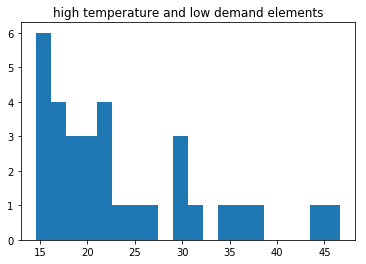

There are 32 records lying in high temperature and low demand ranges


In [34]:
# allocating the elements having high temperature and low demand
highTemp_lowDemand = np.array( np.where( ( trainingData[:, 0] >= 28 ) & ( trainingData[:, 0] <= 34 ) &
                                      ( trainingData[:, 5] >= 3700 ) & ( trainingData[:, 5] <= 5000 ) ) )

highTemp_lowDemandElements = [ trainingData[index] for index in highTemp_lowDemand ][0]

# plotting elements with high temperature and low demand
plt.figure()
plt.hist( highTemp_lowDemandElements[:, 6], 20 )
plt.title( "high temperature and low demand elements" )
plt.show()

print( "There are %d records lying in high temperature and low demand ranges"
        % len( highTemp_lowDemandElements ) )

Based on this we can extract our 11th rule as: <b>IF temperature is high AND demand is low THEN price is medium</b>

<u>Checking high temperature and medium demand elements:</u>

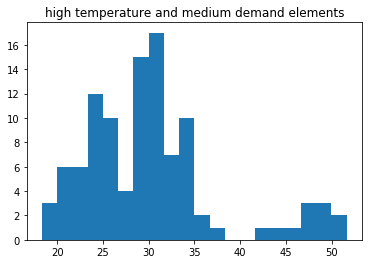

There are 104 records lying in high temperature and medium demand ranges


In [35]:
# allocating the elements having high temperature and medium demand
highTemp_mediumDemand = np.array( np.where( ( trainingData[:, 0] >= 28 ) & ( trainingData[:, 0] <= 34 ) &
                                         ( trainingData[:, 5] >= 4500 ) & ( trainingData[:, 5] <= 6000 ) ) )

highTemp_mediumDemandElements = [ trainingData[index] for index in highTemp_mediumDemand ][0]

# plotting elements with high temperature and medium demand
plt.figure()
plt.hist( highTemp_mediumDemandElements[:, 6], 20 )
plt.title( "high temperature and medium demand elements" )
plt.show()

print( "There are %d records lying in high temperature and medium demand ranges"
        % len( highTemp_mediumDemandElements ) )

Based on this we can extract our 12th rule as: <b>IF temperature is high AND demand is medium THEN price is medium</b>

<u>Checking high temperature and high demand elements:</u>

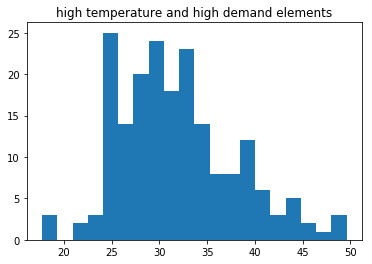

There are 194 records lying in high temperature and high demand ranges


In [36]:
# allocating the elements having high temperature and high demand
highTemp_highDemand = np.array( np.where( ( trainingData[:, 0] >= 28 ) & ( trainingData[:, 0] <= 34 ) &
                                       ( trainingData[:, 5] >= 5500 ) & ( trainingData[:, 5] <= 7000 ) ) )

highTemp_highDemandElements = [ trainingData[index] for index in highTemp_highDemand ][0]

# plotting elements with high temperature and high demand
plt.figure()
plt.hist( highTemp_highDemandElements[:, 6], 20 )
plt.title( "high temperature and high demand elements" )
plt.show()

print( "There are %d records lying in high temperature and high demand ranges"
        % len( highTemp_highDemandElements ) )

Based on this we can extract our 13th rule as: <b>IF temperature is high AND demand is high THEN price is high</b>

<u>Checking high temperature and very high demand elements:</u>

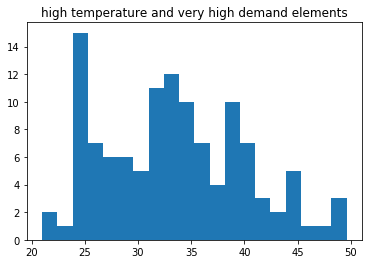

There are 118 records lying in high temperature and very high demand ranges


In [37]:
# allocating the elements having high temperature and very high demand
highTemp_veryHighDemand = np.array( np.where( ( trainingData[:, 0] >= 28 ) & ( trainingData[:, 0] <= 34 ) &
                                           ( trainingData[:, 5] >= 6250 ) & ( trainingData[:, 5] <= 7000 ) ) )

highTemp_veryHighDemandElements = [ trainingData[index] for index in highTemp_veryHighDemand ][0]

# plotting elements with high temperature and very high demand
plt.figure()
plt.hist( highTemp_veryHighDemandElements[:, 6], 20 )
plt.title( "high temperature and very high demand elements" )
plt.show()

print( "There are %d records lying in high temperature and very high demand ranges"
        % len( highTemp_veryHighDemandElements ) )

Based on this we can extract our 14th rule as: <b>IF temperature is high AND demand is very high THEN price is high</b>

#### <u><li>Defining the rules to our Fuzzy model</u>

Now we can define the rules extracted earlier as following:

In [38]:
rule1 = ctrl.Rule( temperature[ "low" ] & 
                   demand[ "very low" ], 
                   price[ "low" ] )

rule2 = ctrl.Rule( temperature[ "low" ] & 
                   demand[ "low" ], 
                   price[ "low" ] )

rule3 = ctrl.Rule( temperature[ "low" ] & 
                   demand[ "medium" ], 
                   price[ "medium" ] )

rule4 = ctrl.Rule( temperature[ "low" ] & 
                   demand[ "high" ],  
                   price[ "medium" ] )

rule5 = ctrl.Rule( temperature[ "medium" ] & 
                   demand[ "very low" ], 
                   price[ "medium" ] )

rule6 = ctrl.Rule( temperature[ "medium" ] & 
                   demand[ "low" ], 
                   price[ "medium" ] )

rule7 = ctrl.Rule( temperature[ "medium" ] & 
                   demand[ "medium" ], 
                   price[ "medium" ] )

rule8 = ctrl.Rule( temperature[ "medium" ] & 
                   demand[ "high" ], 
                   price[ "medium" ] )

rule9 = ctrl.Rule( temperature[ "medium" ] & 
                   demand[ "very high" ], 
                   price[ "high" ] )

rule10 = ctrl.Rule( temperature[ "high" ] & 
                   demand[ "very low" ], 
                   price[ "low" ] )

rule11 = ctrl.Rule( temperature[ "high" ] & 
                   demand[ "low" ], 
                   price[ "medium" ] )

rule12 = ctrl.Rule( temperature[ "high" ] & 
                   demand[ "medium" ], 
                   price[ "medium" ] )

rule13 = ctrl.Rule( temperature[ "high" ] & 
                   demand[ "high" ], 
                   price[ "high" ] )

rule14 = ctrl.Rule( temperature[ "high" ] & 
                   demand[ "very high" ], 
                   price[ "high" ] )

fuzzy_ctrl = ctrl.ControlSystem( [ rule1, rule2, rule3, rule4, rule5,
                                   rule6, rule7, rule8, rule9, rule10,
                                   rule11, rule12, rule13, rule14] )

electricityPriceSystem = ctrl.ControlSystemSimulation( fuzzy_ctrl )

<hr>

## 4. System performance evaluation

Evaluating the system performance using the terms of the average relative error for both our training dataset as well as testing dataset:

#### <u><li>System performance evaluation for the training dataset</u>

In [39]:
# defining the number of elements in our training dataset
N = len( trainingData )

# assigning TargetOutput with Price values in the training dataset
TargetOutput = trainingData[:, 6] 

# initiating SystemOutput with an array of zeros with length of N
SystemOutput = np.zeros( N, dtype=np.float64 )

# performe forecasting for each element in our training dataset and assigning
# the output of each in the SystemOutput array
for i in range( N ):
    electricityPriceSystem.input[ "temperature" ] = trainingData[ i, 2 ]
    electricityPriceSystem.input[ "demand" ] = trainingData[ i, 5 ]
    electricityPriceSystem.compute()
    SystemOutput[ i ] = electricityPriceSystem.output[ "price" ]

# applying the average relative error formula on the collected SystemOutput and TargetOutput values
RErr = np.sum( np.absolute( TargetOutput-SystemOutput ) / np.absolute( TargetOutput ) ) / N

print( "The Average Relative Error Value is", RErr )

The Average Relative Error Value is 0.2299172294264906


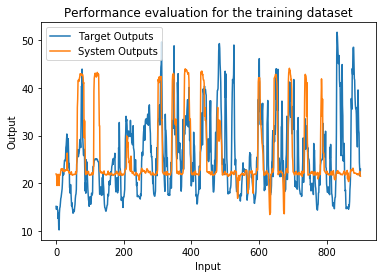

In [40]:
# plotting SystemOutput and TargetOutput to visualize the differences
plt.plot( TargetOutput )
plt.plot( SystemOutput )
plt.xlabel( "Input" )
plt.ylabel( "Output" )
plt.title( "Performance evaluation for the training dataset" )
plt.legend( [ "Target Outputs", "System Outputs" ] )
plt.show()

#### <u><li>System performance evaluation for the testing dataset</u>

In [41]:
# defining the number of elements in our testing dataset
N = len( testingData )

# assigning TargetOutput with Price values in the testing dataset
TargetOutput = testingData[:, 6]

# initiating SystemOutput with an array of zeros with length of N
SystemOutput = np.zeros( N, dtype=np.float64 )

# performe forecasting for each element in our testing dataset and assigning
# the output of each in the SystemOutput array
for i in range( N ):
    electricityPriceSystem.input[ "temperature" ] = testingData[ i, 2 ]
    electricityPriceSystem.input[ "demand" ] = testingData[ i, 5 ]
    electricityPriceSystem.compute()
    SystemOutput[ i ] = electricityPriceSystem.output[ "price" ]

# applying the average relative error formula on the collected SystemOutput and TargetOutput values
RErr = np.sum( np.absolute( TargetOutput-SystemOutput ) / np.absolute( TargetOutput ) ) / N

print( "The Average Relative Error Value is", RErr )

The Average Relative Error Value is 0.22921697065851898


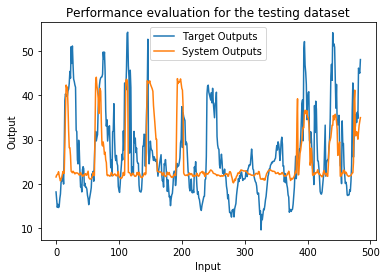

In [42]:
# plotting SystemOutput and TargetOutput to visualize the differences
plt.plot( TargetOutput )
plt.plot( SystemOutput )
plt.xlabel( "Input" )
plt.ylabel( "Output" )
plt.title( "Performance evaluation for the testing dataset" )
plt.legend( [ "Target Outputs", "System Outputs" ] )
plt.show()